In [23]:
import tensorflow as tf 
import sklearn as sl
import tensorflow.keras.layers as KL
import numpy as np 
import matplotlib.pyplot as plt

from keras.utils.vis_utils import plot_model

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame

In [3]:
dataset = np.random.uniform(size = (100000,100))
dataset.shape
#print(dataset[0])

(100000, 100)

In [4]:
classes = np.random.randint(10, size=100000)
print(classes)

[0 5 3 ... 4 2 8]


In [5]:
x_train, x_test, y_train, y_test = train_test_split(dataset, classes)
print("x_train",x_train.shape)
print("x_test",x_test.shape)

x_train (75000, 100)
x_test (25000, 100)


In [7]:
# create input layer
inputs = KL.Input(shape=100)                            #(None, 100000, 100)
# flatten the inputs
#first_layer = KL.Flatten()(inputs)                     #(None, 1000000)


In [8]:
first_layer = KL.Dense(512, activation=tf.nn.relu)(inputs)            #(None, 512)

second_layer = KL.Dense(256, activation=tf.nn.relu)(first_layer)

outputs = KL.Dense(10, activation=tf.nn.softmax)(second_layer)         #(None, 10)

# print tensor shape
print ("layer 0", inputs.shape)               #input layer
print("layer 1", first_layer.shape)           #hidden layer 1
print ("layer 2", second_layer.shape)         #hidden layer 2
print ("output", outputs.shape)               #output layer

layer 0 (None, 100)
layer 1 (None, 512)
layer 2 (None, 256)
output (None, 10)


In [9]:
#create model (in, out)
model = tf.keras.models.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense (Dense)                (None, 512)               51712     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 185,610
Trainable params: 185,610
Non-trainable params: 0
_________________________________________________________________


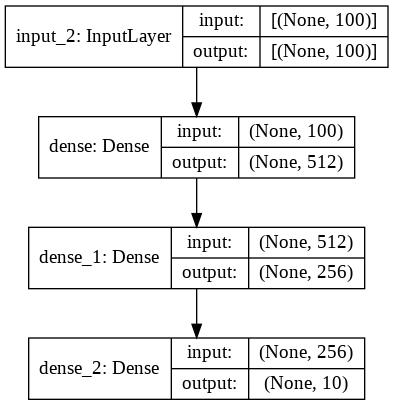

In [24]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [19]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
print(x_test)
model.fit(x_train, y_train, epochs=50)
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {0} - Test Acc: {1}".format(test_loss, test_acc))

[[0.14179308 0.84724573 0.95735186 ... 0.34203483 0.43106458 0.9386795 ]
 [0.15282705 0.08628477 0.5580028  ... 0.05374362 0.36469735 0.39748971]
 [0.3663582  0.32429519 0.42980175 ... 0.49188232 0.42259845 0.96333332]
 ...
 [0.26734131 0.16208186 0.37582404 ... 0.03270273 0.75105513 0.16485503]
 [0.28068368 0.87847377 0.73013436 ... 0.60910877 0.75474222 0.69188117]
 [0.65361616 0.7934062  0.80332708 ... 0.18960986 0.24055569 0.94057996]]
Epoch 1/50
2344/2344 [==============================] - 11s 4ms/step - loss: 2.3013 - accuracy: 0.1051
Epoch 2/50
2344/2344 [==============================] - 10s 4ms/step - loss: 2.3005 - accuracy: 0.1026
Epoch 3/50
2344/2344 [==============================] - 10s 4ms/step - loss: 2.3007 - accuracy: 0.1040
Epoch 4/50
2344/2344 [==============================] - 10s 4ms/step - loss: 2.3006 - accuracy: 0.1056
Epoch 5/50
2344/2344 [==============================] - 10s 4ms/step - loss: 2.3004 - accuracy: 0.1040
Epoch 6/50
2344/2344 [===================